In [1]:
# Import necessary libraries 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the diabetes dataset 
diabetes = datasets.load_diabetes()

In [4]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [5]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
# Use only one feature for simplicity (feature at index 2) 
X = diabetes.data[:, np.newaxis, 2] 
y = diabetes.target

In [8]:
X.shape, y.shape

((442, 1), (442,))

In [9]:
# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
random_state=42)

In [14]:
X_train.shape

(353, 1)

In [10]:
# Transform features into polynomial features (degree 2) 
poly = PolynomialFeatures(degree=2) 

In [11]:
poly

PolynomialFeatures()

In [12]:
X_train_poly = poly.fit_transform(X_train) 
X_test_poly = poly.transform(X_test) 

In [13]:
X_train_poly.shape

(353, 3)

In [15]:
# Create a linear regression model 
model = LinearRegression() 

In [16]:
# Train the model using the transformed polynomial features 
model.fit(X_train_poly, y_train)

LinearRegression()

In [17]:
# Make predictions on the test data 
y_pred = model.predict(X_test_poly)

In [18]:
# Print model coefficients 
print("Coefficients:", model.coef_) 
print("Intercept:", model.intercept_) 

Coefficients: [  0.         975.39882856 763.19617621]
Intercept: 150.34041106725957


In [19]:
# Calculate and print metrics 
print("Mean squared error (MSE):", mean_squared_error(y_test, y_pred)) 
print("R² score:", r2_score(y_test, y_pred))

Mean squared error (MSE): 4085.025480871632
R² score: 0.2289715971205667


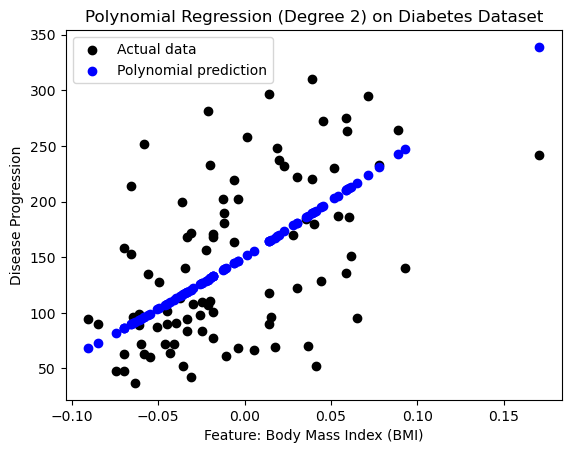

In [21]:
# Plot the results 
plt.scatter(X_test, y_test, color='black', label='Actual data') 
plt.scatter(X_test, y_pred, color='blue', label='Polynomial prediction') 
plt.title("Polynomial Regression (Degree 2) on Diabetes Dataset") 
plt.xlabel("Feature: Body Mass Index (BMI)") 
plt.ylabel("Disease Progression")
plt.legend() 
plt.show() 
